## Regresión lineal
En los sistemas de bicicletas compartidas, el proceso de arriendo y devolución es automatizado. Normalmente, las bicicletas se pueden arrendar en un lugar y regresar en otro sin tener que depender de humanos. Actualmente, existen varios programas para compartir bicicletas en diferentes ciudades. El conjunto de datos bikes.csv, se deriva de un registro de dos años de un sistema de uso compartido de bicicletas en determinada ciudad.

Las variables disponibles son las siguientes:

* date: La fecha completa, en formato año-mes-día.
* season: Temporada del año, 1 a 4.
* year: Año (0 = 2020, 1 = 2021).
* month: Mes (1 a 12).
* holiday: Si el día es feriado o no.
* weekday: Día de la semana (codificado de 0 a 6).
* workingday: 1 para días laborables, 0 para fines de semana y festivos.
* weather: Codificado de la siguiente manera:
  1. Claro a parcialmente nublado.
  2. Niebla, pero sin precipitaciones más intensas.
  3. Lluvia ligera o nieve, posiblemente con truenos.
  4. Fuertes lluvias o nieve.
* temp: Temperatura normalizada en grados celsius. Los valores se obtienen mediante (t − tmin)/(tmax − tmin), tmin = −8, tmax = +39.
* atemp: Temperatura de sensación normalizada en grados celsius. Los valores se obtienen mediante (t − tmin)/(tmax − tmin), tmin = −16, tmax = +50.
* humidity: Humedad normalizada (= humedad real dividida por 100).
* windspeed: Velocidad normalizada del viento (= velocidad real del viento en millas por hora dividido por 67).
* registered: Número de alquileres de bicicletas ese día por usuarios registrados.
* Target: Cantidad total de arriendos de bicicletas ese día, incluidos los casuales y los usuarios registrados.

### Pregunta 1
Cargue la base de datos bike.csv. Realice las siguientes procesos de limpieza

* Transforme a factor las variables categóricas.
* Transforme las variables temp y atemp a grados celsius, ya que se encuentran en escala normalizada. Use las siguientes fórmulas respectivamente:
(47*temp-8).
(66*atemp-16).
* Transforme la variable humedad a porcentaje (multiplique la variable por 100).
* Transforme la velocidad del viento a millas por hora (multiplique por 67 el valor de la variable normalizada).

In [ ]:
import pandas as pd

In [ ]:
import pandas as csv

In [ ]:
data_bikes = pd.read_csv("bikes.csv")

In [ ]:
data_bikes.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,registered,Target
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1518,1600


In [ ]:
data_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        731 non-null    object 
 1   season      731 non-null    int64  
 2   year        731 non-null    int64  
 3   month       731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weather     731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  humidity    731 non-null    float64
 11  windspeed   731 non-null    float64
 12  registered  731 non-null    int64  
 13  Target      731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [ ]:
# Transforme las variables temp y atemp a grados celsius.
def transform_temp(temp):
    return 47 * temp - 8

def transform_atemp(atemp):
    return 66 * atemp - 16

data_bikes['temp'] = transform_temp(data_bikes['temp'])
data_bikes['atemp'] = transform_atemp(data_bikes['atemp'])


In [ ]:
# Multiplicar la columna 'humedad' por 100 para convertir a porcentaje
data_bikes['humidity'] = data_bikes['humidity'] * 100


In [ ]:
#Transforme la velocidad del viento a millas por hora
data_bikes['windspeed'] = data_bikes['windspeed'] * 67

In [ ]:
data_bikes.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,registered,Target
0,2011-01-01,1,0,1,0,6,0,2,8.175849,7.999250,80.5833,10.749882,654,985
1,2011-01-02,1,0,1,0,0,0,2,9.083466,7.346774,69.6087,16.652113,670,801
2,2011-01-03,1,0,1,0,1,1,1,1.229108,-3.499270,43.7273,16.636703,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,1.400000,-1.999948,59.0435,10.739832,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,2.666979,-0.868180,43.6957,12.522300,1518,1600


### Pregunta 2
Realice un gráfico del número de arriendos de bicicletas vs temperatura, además, añada una curva de regresión lineal. ¿Cuál es la relación entre el número de arriendos con la temperatura?

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

<Figure size 1000x600 with 0 Axes>

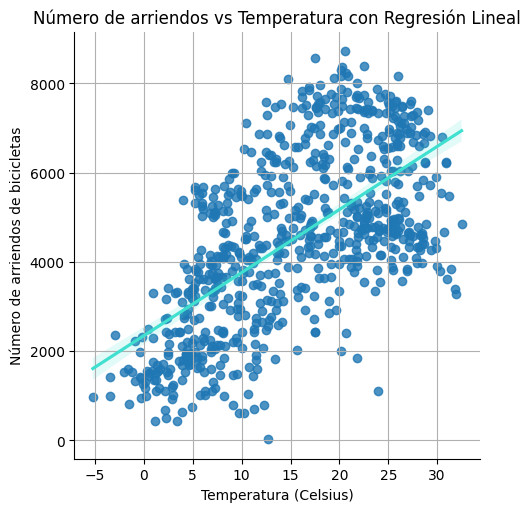

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lmplot(y = 'Target', x = 'temp', data = data_bikes, line_kws={'color': 'turquoise'})
plt.xlabel('Temperatura (Celsius)')
plt.ylabel('Número de arriendos de bicicletas')
plt.title('Número de arriendos vs Temperatura con Regresión Lineal')
plt.grid(True)
plt.show()


Existe una correlacion directa entre el numero de arriendo de bicicletas y el aumento de la temperatura

### Pregunta 3
¿Es la relación entre la temperatura y el número de bicicletas arrendas igual en los dos años?, realice en un mismo gráfico la relación entre el número de arriendo vs temperatura para los dos años, añada las curvas de regresión lineal.

In [ ]:
data_bikes['year'] = data_bikes['year'].astype('category')

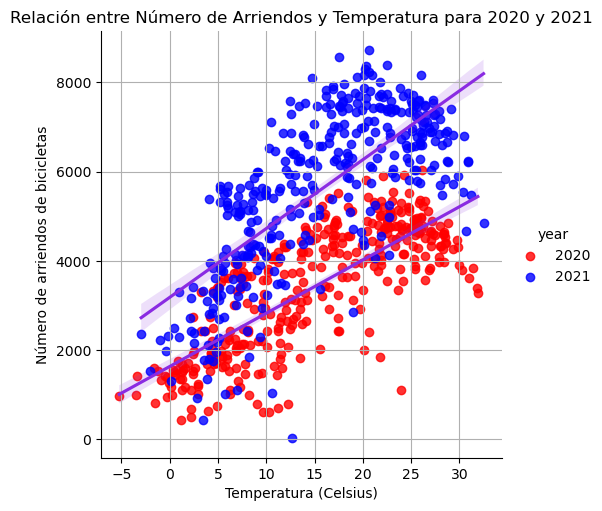

In [ ]:
data_bikes['year'] = data_bikes['year'].map({0: '2020', 1: '2021'})

# Definir una paleta de colores para los puntos
custom_palette = {'2020': 'red', '2021': 'blue'}

# Crear el gráfico de regresión lineal con colores personalizados
sns.lmplot(y='Target', x='temp', hue='year', data=data_bikes, line_kws={'color':'blueviolet'}, palette=custom_palette)
plt.xlabel('Temperatura (Celsius)')
plt.ylabel('Número de arriendos de bicicletas')
plt.title('Relación entre Número de Arriendos y Temperatura para 2020 y 2021')
plt.grid(True)

plt.show()

se observa que en los dos años analizados, existio una correlacion directa entre el numero de arriendo de bicicletas y el aumento de la temperaturea, siendo el año 2021 donde se arrendaron mas bicicletas.

### Pregunta 4
Por selección forward, construya un modelo sin considerar las variables
*date
*month
*registered
Interpreta el factor asociado a la Temperatura y días feriados.

In [ ]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import statsmodels.api as sm

In [ ]:
df = data_bikes.drop(['date', 'registered', 'month'], axis=1)
df.head()

,season,year,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,Target
0,1,2020,0,6,0,2,8.175849,7.999250,80.5833,10.749882,985
1,1,2020,0,0,0,2,9.083466,7.346774,69.6087,16.652113,801
2,1,2020,0,1,1,1,1.229108,-3.499270,43.7273,16.636703,1349
3,1,2020,0,2,1,1,1.400000,-1.999948,59.0435,10.739832,1562
4,1,2020,0,3,1,1,2.666979,-0.868180,43.6957,12.522300,1600


In [ ]:
import statsmodels.api as sm

In [ ]:
# para obtener dummies pasamos las siguinetes variables categoricas
columns_to_convert = ['season', 'holiday', 'weekday', 'workingday', 'weather']

for column in columns_to_convert:
    df[column] = df[column].astype('str')



In [ ]:
df= pd.get_dummies(df, drop_first = True, dtype = int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          731 non-null    float64
 1   atemp         731 non-null    float64
 2   humidity      731 non-null    float64
 3   windspeed     731 non-null    float64
 4   Target        731 non-null    int64  
 5   season_2      731 non-null    int32  
 6   season_3      731 non-null    int32  
 7   season_4      731 non-null    int32  
 8   year_2021     731 non-null    int32  
 9   holiday_1     731 non-null    int32  
 10  weekday_1     731 non-null    int32  
 11  weekday_2     731 non-null    int32  
 12  weekday_3     731 non-null    int32  
 13  weekday_4     731 non-null    int32  
 14  weekday_5     731 non-null    int32  
 15  weekday_6     731 non-null    int32  
 16  workingday_1  731 non-null    int32  
 17  weather_2     731 non-null    int32  
 18  weather_3     731 non-null    

In [ ]:
# Extraer los datos para la regresión
X = df.drop(['Target'], axis=1)  # Temperatura como variable independiente
y = df['Target']  # Número de arriendos como variable dependiente

# Crear y ajustar el modelo de regresión lineal
regressor = LinearRegression()
regressor.fit(X, y)

# Predecir los valores de arriendos usando el modelo ajustado
y_pred = regressor.predict(X)


In [ ]:
X=sm.add_constant(X)

In [ ]:
model= sm.OLS(y, X).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     201.3
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          1.97e-258
Time:                        22:33:47   Log-Likelihood:                -5927.3
No. Observations:                 731   AIC:                         1.189e+04
Df Residuals:                     713   BIC:                         1.197e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2246.9384    240.702      9.335      0.000    1774.370    2719.507
temp            84.2605     29.510      2.855      0.004      26.324     142.197
atemp           19.1717     22.949      0.835      0.404     -25.883      64.227
humidity       -12.3543      2.944     -4.196      0.000     -18.134      -6.574
windspeed      -40.5147      6.437     -6.294      0.000     -53.152     -27.878
season_2      1136.9785    112.493     10.107      0.000     916.121    1357.836
season_3       854.4831    149.178      5.728      0.000     561.603    1147.363
season_4      1538.9881     95.919     16.045      0.000    1350.671    1727.305
year_2021     2017.7533     61.156     32.993      0.000    1897.685    2137.821
holiday_1     -320.6520    168.101     -1.907      0.057    -650.684       9.380
weekday_1     -127.3514     75.589     -1.685      0.092    -275.755      21.053
weekday_2      -40.1262     81.587     -0.492      0.623    -200.306     120.053
weekday_3       30.8555     81.926      0.377      0.707    -129.990     191.701
weekday_4       53.2454     81.077      0.657      0.512    -105.932     212.423
weekday_5       98.3948     81.530      1.207      0.228     -61.672     258.462
weekday_6      442.9183    112.695      3.930      0.000     221.665     664.171
workingday_1   335.6701     70.483      4.762      0.000     197.291     474.049
weather_2     -448.2993     80.783     -5.549      0.000    -606.900    -289.699
weather_3    -1965.5276    206.748     -9.507      0.000   -2371.434   -1559.621
==============================================================================
Omnibus:                       98.125   Durbin-Watson:                   1.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.130
Skew:                          -0.737   Prob(JB):                     4.78e-50
Kurtosis:                       5.299   Cond. No.                     9.36e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.99e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
pip install stepwise_regression

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import stepwise_regression

In [ ]:
from stepwise_regression import step_reg

In [ ]:
ford_selection= step_reg.forward_regression(X, y, 0.05, verbose= False)
ford_selection

c:\Users\camil\miniconda3\envs\default\lib\site-packages\stepwise_regression\step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
c:\Users\camil\miniconda3\envs\default\lib\site-packages\stepwise_regression\step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
c:\Users\camil\miniconda3\envs\default\lib\site-packages\stepwise_regression\step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
c:\Users\camil\miniconda3\envs\default\lib\site-packages\stepwise_regression\step_reg.py:13: FutureWarning: The default d

['const',
 'atemp',
 'year_2021',
 'season_4',
 'weather_3',
 'weather_2',
 'season_2',
 'season_3',
 'windspeed',
 'humidity',
 'holiday_1',
 'temp']

In [ ]:
X_ford= X[ford_selection]

In [ ]:
model_fordward= sm.OLS(y, X_ford).fit()

In [ ]:

model_fordward.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     301.7
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          9.87e-261
Time:                        22:33:50   Log-Likelihood:                -5939.0
No. Observations:                 731   AIC:                         1.190e+04
Df Residuals:                     719   BIC:                         1.196e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2595.2769    229.670     11.300      0.000    2144.373    3046.180
atemp         14.0195     23.132      0.606      0.545     -31.394      59.433
year_2021   2013.2853     61.868     32.542      0.000    1891.822    2134.749
season_4    1539.3617     97.019     15.867      0.000    1348.887    1729.836
weather_3  -1891.9461    207.877     -9.101      0.000   -2300.064   -1483.828
weather_2   -415.1872     81.286     -5.108      0.000    -574.773    -255.602
season_2    1130.3972    113.750      9.938      0.000     907.076    1353.718
season_3     841.4258    150.748      5.582      0.000     545.466    1137.385
windspeed    -41.2764      6.503     -6.347      0.000     -54.043     -28.509
humidity     -13.5668      2.960     -4.583      0.000     -19.379      -7.755
holiday_1   -702.1517    182.875     -3.840      0.000   -1061.185    -343.118
temp          91.8754     29.738      3.089      0.002      33.492     150.259
==============================================================================
Omnibus:                       92.058   Durbin-Watson:                   1.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.265
Skew:                          -0.703   Prob(JB):                     5.97e-46
Kurtosis:                       5.205   Cond. No.                         589.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

temperatura, holiday


## Pregunta 5
Utilice los residuos del modelo elegido para estudiar la validez de los supuestos:

Normalidad.
Independencia
Igualdad de varianzas (homocedasticidad)
¿Es un modelo adecuado estadísticamente? Justifique sus afirmaciones.

### Normalidad
H0: Los residuos siguen una distribución normal.
H1: Los residuos no siguen una distribución normal.

Text(0.5, 1.0, 'Gráfico QQ de residuos del modelo')

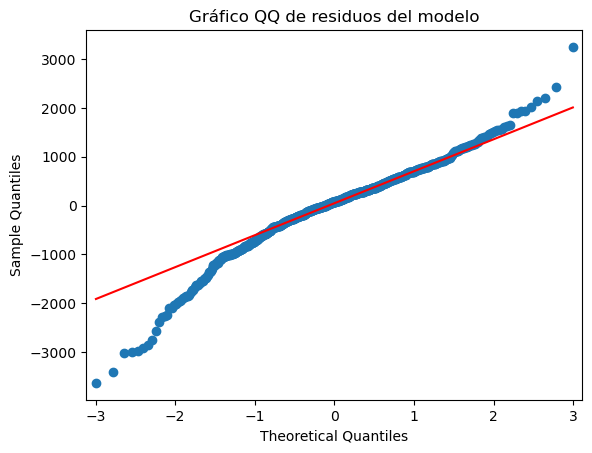

In [ ]:
sm.qqplot(model_fordward.resid, line='q');
plt.title('Gráfico QQ de residuos del modelo')

In [ ]:
from scipy.stats import kstest

In [ ]:
## TEST
# H0: Normalidad
# H1: No Normalidad
ks_test = kstest(model_fordward.resid, 'norm')

In [ ]:
ks_test.pvalue < 0.05
# El modelo o los residuos del modelo no cumplen con la hipótesis de normalidad

True

### Homocedasticidad
H0: Los residuos son homocedasticidad.
H1: Los residuos son heterocedasticidad.

Los residuos son heterocedásticos.


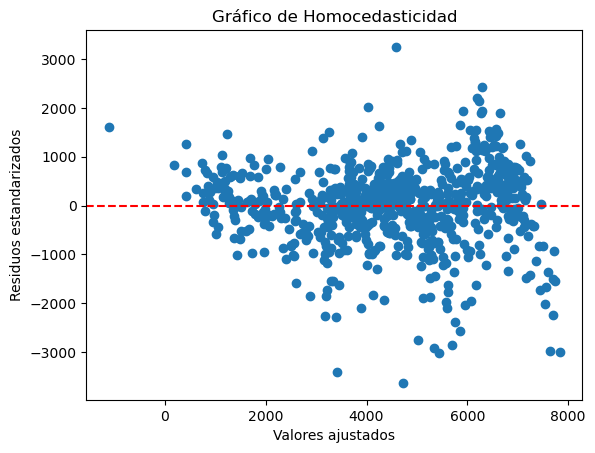

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

# Calcular el estadístico de Breusch-Pagan y el valor p
estadistico, valor_p, _, _ = sms.het_breuschpagan(model_fordward.resid, model_fordward.model.exog)

# Comprobar si los residuos son homocedásticos o heterocedásticos
if valor_p < 0.05:
    print("Los residuos son heterocedásticos.")
else:
    print("Los residuos son homocedásticos.")

# Crear el gráfico de homocedasticidad
plt.scatter(model_fordward.fittedvalues, model_fordward.resid)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos estandarizados')
plt.title('Gráfico de Homocedasticidad')
plt.axhline(y=0, color='red', linestyle='--')  # Línea horizontal en y=0 para referencia
plt.show()


In [ ]:
# Homocedasticidad -> varianza iguales
### Test Breuch-Pagan
#### H0: Homocedasticidad
#### H1: Heterocedasticos
import statsmodels.stats.api as sms
estadistico, valor_p, _, _ = sms.het_breuschpagan(model_fordward.resid, model_fordward.model.exog)

In [ ]:
valor_p < 0.05

True

### No se cumple el supuesto de Homocedasticidad, eso quiere decir que en general nuestro modelo
### no es bueno

### Autocorrelación
H0: Los residuos son independientes
H1: Los residuos están correlacionados.

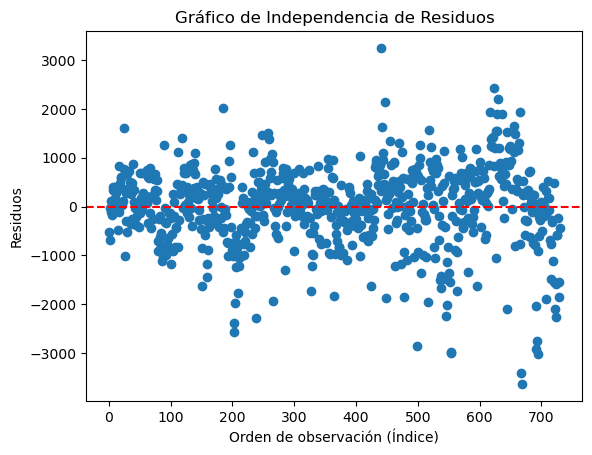

In [ ]:
# Crear el gráfico de independencia de los residuos
plt.scatter(data_bikes.index, model_fordward.resid)
plt.xlabel('Orden de observación (Índice)')
plt.ylabel('Residuos')
plt.title('Gráfico de Independencia de Residuos')
plt.axhline(y=0, color='red', linestyle='--')  # Línea horizontal en y=0 para referencia
plt.show()


In [ ]:
## Independencia de los residuos

# H0: Los residuos no están autocorrelacionados (son independientes)
# H1: Los residuos están correlacionados (no son independientes)
# Durbin-Watson: 1.251
# si nosotros tenemos valores entre [1.8, 2.2], entonces no se rechaza H0
# En este caso nosotros tenemos un valor de 1.251, es decir rechazamos H0, por lo tanto
# los residuos no son independientes.

#En este gráfico, si los puntos están dispersos de manera aleatoria alrededor de la línea horizontal roja en y=0,
#esto sugiere independencia de los residuos. Si los puntos forman algún patrón o tendencia, podría indicar que los residuos no son independientes,
#y esto podría ser problemático para el modelo.

#Es importante recordar que la independencia de los residuos es un supuesto importante en la regresión lineal y,
#si no se cumple, puede afectar la validez de los resultados y las inferencias realizadas con el modelo.
#Si observas algún patrón claro en el gráfico de independencia de los residuos,
#es posible que necesites considerar modelos más avanzados que tengan en cuenta la estructura de dependencia en los datos.


In [ ]:
#gráfico de correlación -tabla
from statsmodels.stats.stattools import durbin_watson

# realizar la prueba de Durbin-Watson
durbin_watson (model.resid)

1.0610474867896602

In [ ]:
residuos= model_fordward.resid

In [ ]:
model.model.exog_names

['const',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'season_2',
 'season_3',
 'season_4',
 'year_2021',
 'holiday_1',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'workingday_1',
 'weather_2',
 'weather_3']

### Pregunta 6
Realice una predicción de arriendos de bicicletas para un día con las siguientes cualidades

In [ ]:
prediction= pd.DataFrame({
 'temp': 12,
 'atemp': 11,
 'humidity': 66.3,
 'windspeed': 12.5,
 'season_2': 1,
 'season_3': 0,
 'season_4': 0,
 'year_2021': 1,
 'holiday_1': 1,
 'weekday_1': 0,
 'weekday_2': 0,
 'weekday_3': 0,
 'weekday_4': 0,
 'weekday_5': 0,
 'weekday_6': 1,
 'workingday_1:': 0,
 'weather_2': 1,
 'weather_3': 0}, index = ['0'])
prediction

,temp,atemp,humidity,windspeed,season_2,season_3,season_4,year_2021,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1:,weather_2,weather_3
0,12,11,66.3,12.5,1,0,0,1,1,0,0,0,0,0,1,0,1,0


In [ ]:
orden_deseado = ['temp', 'atemp', 'humidity', 'windspeed', 'season_2', 'season_3', 'season_4',
                 'year_2012', 'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
                 'weekday_6', 'workingday_1', 'weather_2', 'weather_3']

In [ ]:
prediction

,temp,atemp,humidity,windspeed,season_2,season_3,season_4,year_2021,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1:,weather_2,weather_3
0,12,11,66.3,12.5,1,0,0,1,1,0,0,0,0,0,1,0,1,0


In [ ]:
prediction['const'] = 1.0

In [ ]:
variables_prediccion = prediction[ford_selection]
variables_prediccion

,const,atemp,year_2021,season_4,weather_3,weather_2,season_2,season_3,windspeed,humidity,holiday_1,temp
0,1.0,11,1,0,0,1,1,0,12.5,66.3,1,12


In [ ]:
y_pred= model_fordward.predict(variables_prediccion)
print("Predicción de arriendos de bicicletas para el día dado:")
y_pred

Predicción de arriendos de bicicletas para el día dado:


0    4462.903848
dtype: float64

In [ ]:
print("Predicción de arriendos de bicicletas para el día:")
print(y_pred)

Predicción de arriendos de bicicletas para el día:
0    4462.903848
dtype: float64


## Regresión logística
En un centro meteorológico, se contratan sus servicios como Data Scientist para construir un modelo que prediga si lloverá o no en las próximas 24 horas, utilizando información de las 24 horas previas. Se dispone de un conjunto de 19 variables meteorológicas. La descripción de las variables es la siguiente:

* MinTemp Temperatura mínima registrada.
* MaxTemp Temperatura máxima registrada.
* Lluvia Cantidad de lluvia registrada ese día en mm.
* Evaporacion Evaporación (mm) en 24 horas.
* Sol Número de horas de sol brillante en el día.
* VelRafaga La velocidad (km/h) de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche.
* Vel9am La velocidad (km/h) de la ráfaga de viento a las 9am.
* Vel3pm La velocidad (km/h) de la ráfaga de viento a las 9am.
* Hum9am Porcentaje de humedad a las 9am.
* Hum3pm Porcentaje de humedad a las 3pm.
* Pres9am Presión atmosférica (hpa) a nivel del mar a las 9am.
* Pre3pm Presión atmosférica (hpa) a nivel del mar a las 3pm.
* Nub9am Fracción del cielo cubierto por nubes a las 9am. Se mide en “octavos”, de manera que un valor 0 indica cielo. totalmente despejado y 8, cielo totalmente cubierto.
* Nub3pm Fracción del cielo cubierto por nubes a las 3pm. Se mide en “octavos”, de manera que un valor 0 indica cielo. totalmente despejado y 8, cielo totalmente cubierto.
* Temp9am Temperatura en grados celsius a las 9am.
* Temp3pm Temperatura en grados celsius a las 3pm.
* LluviaHoy Variable indicadora que toma el valor 1 si la precipitación en mm. en las últimas 24 horas. excede 1 mm. y 0, si no.
* Koppen Clasificación Koppen de la zona de medición (Temperate, Subtropical, Grassland, Tropical, Desert).
* Estación Estación del Año.
* LluviaMan Indicador de lluvia al día siguiente de la medición.

### Pregunta 7
Cargue la base de datos Lluvia_full.csv, codifique la variable LluviaMan como 0 y 1 para los días sin lluvia y con lluvia respectivamente. Además, realice una separación de la base de datos en un set de entrenamiento y set de validación. Utilice una proporción de 80:20 respectivamente. Para poder replicar sus resultados, fije una semilla antes de obtener los indices. Para ello utilice la función random.seed(2023).

In [ ]:
data_lluvia = pd.read_csv("Lluvia_full.csv")
data_lluvia.LluviaMan.value_counts()

No     43993
Yes    12427
Name: LluviaMan, dtype: int64

In [ ]:
data_lluvia.head

<bound method NDFrame.head of        MinTemp  MaxTemp  Lluvia  Evaporacion   Sol  VelRafaga  Vel9am  Vel3pm  \
0          7.6     19.3     0.0          3.4   9.4       35.0    13.0    13.0   
1          6.8     19.5     0.0          3.4   9.4       46.0    19.0    28.0   
2          5.5     13.9     0.0          2.8   3.8       44.0    26.0    13.0   
3          8.6     14.3     0.0          2.8   3.8       35.0    13.0    17.0   
4          7.9     13.0     0.0          2.8   3.8       39.0    15.0    17.0   
...        ...      ...     ...          ...   ...        ...     ...     ...   
56415      7.6     16.1     2.8          5.6  10.6       50.0    20.0    28.0   
56416     13.3     15.5    39.8          7.2   9.1       54.0    30.0    24.0   
56417     13.7     23.4     3.6          5.8   3.3       85.0     6.0     6.0   
56418     14.0     26.9     3.6          4.4   9.7       39.0     4.0    17.0   
56419      8.0     24.3     0.0          3.4   6.3       30.0     6.0    20.0  

In [ ]:
data_lluvia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      56420 non-null  float64
 1   MaxTemp      56420 non-null  float64
 2   Lluvia       56420 non-null  float64
 3   Evaporacion  56420 non-null  float64
 4   Sol          56420 non-null  float64
 5   VelRafaga    56420 non-null  float64
 6   Vel9am       56420 non-null  float64
 7   Vel3pm       56420 non-null  float64
 8   Hum9am       56420 non-null  float64
 9   Hum3pm       56420 non-null  float64
 10  Pres9am      56420 non-null  float64
 11  Pre3pm       56420 non-null  float64
 12  Nub9am       56420 non-null  float64
 13  Nub3pm       56420 non-null  float64
 14  Temp9am      56420 non-null  float64
 15  Temp3pm      56420 non-null  float64
 16  LluviaHoy    56420 non-null  object 
 17  LluviaMan    56420 non-null  object 
 18  Koppen       56420 non-null  object 
 19  Esta

In [ ]:
import numpy as np

In [ ]:
data_lluvia['LluviaMan'] = np.where(data_lluvia['LluviaMan']=="Yes",1,0)

In [ ]:
data_lluvia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      56420 non-null  float64
 1   MaxTemp      56420 non-null  float64
 2   Lluvia       56420 non-null  float64
 3   Evaporacion  56420 non-null  float64
 4   Sol          56420 non-null  float64
 5   VelRafaga    56420 non-null  float64
 6   Vel9am       56420 non-null  float64
 7   Vel3pm       56420 non-null  float64
 8   Hum9am       56420 non-null  float64
 9   Hum3pm       56420 non-null  float64
 10  Pres9am      56420 non-null  float64
 11  Pre3pm       56420 non-null  float64
 12  Nub9am       56420 non-null  float64
 13  Nub3pm       56420 non-null  float64
 14  Temp9am      56420 non-null  float64
 15  Temp3pm      56420 non-null  float64
 16  LluviaHoy    56420 non-null  object 
 17  LluviaMan    56420 non-null  int32  
 18  Koppen       56420 non-null  object 
 19  Esta

In [ ]:
data_lluvia.isna().sum()

MinTemp        0
MaxTemp        0
Lluvia         0
Evaporacion    0
Sol            0
VelRafaga      0
Vel9am         0
Vel3pm         0
Hum9am         0
Hum3pm         0
Pres9am        0
Pre3pm         0
Nub9am         0
Nub3pm         0
Temp9am        0
Temp3pm        0
LluviaHoy      0
LluviaMan      0
Koppen         0
Estacion       0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import random

In [ ]:
X = data_lluvia.drop(['LluviaMan'], axis = 1)
y = data_lluvia['LluviaMan']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.20,
                                                   # train_size = 0.8
                                                   random_state = 2023)

In [ ]:
X_train.head()

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,Koppen,Estacion
31665,17.2,32.8,0.0,12.6,13.4,54.0,22.0,20.0,50.0,33.0,1012.6,1008.8,1.0,2.0,20.4,31.2,No,Temperate,Verano
36405,8.7,13.8,4.4,0.2,3.2,44.0,13.0,22.0,99.0,65.0,1010.2,1012.1,7.0,6.0,10.8,13.1,Yes,Temperate,Otoño
35309,4.3,16.6,0.0,2.4,9.4,24.0,7.0,9.0,65.0,38.0,1023.0,1020.7,3.0,2.0,11.3,16.5,No,Temperate,Invierno
24159,11.1,18.5,1.0,2.8,1.4,52.0,11.0,31.0,93.0,52.0,1019.4,1020.2,8.0,7.0,13.3,16.5,No,Temperate,Otoño
27018,10.2,15.1,14.8,6.8,5.2,67.0,15.0,37.0,74.0,45.0,1010.6,1013.6,7.0,7.0,12.5,13.0,Yes,Subtropical,Primavera


In [ ]:
X_test.head()

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,Koppen,Estacion
14215,19.6,29.6,0.0,10.6,11.1,41.0,24.0,22.0,58.0,46.0,1016.7,1013.7,4.0,2.0,25.5,27.7,No,Temperate,Primavera
35351,8.6,11.2,2.0,0.0,0.0,54.0,30.0,30.0,83.0,75.0,1027.7,1026.8,7.0,7.0,10.3,10.9,Yes,Temperate,Invierno
40305,6.7,16.2,0.8,3.4,6.0,46.0,22.0,28.0,76.0,66.0,1021.8,1022.8,7.0,7.0,11.8,14.1,No,Temperate,Primavera
27060,7.1,26.3,0.0,8.0,9.8,43.0,31.0,15.0,22.0,12.0,1019.2,1013.9,0.0,0.0,18.0,24.9,No,Desert,Primavera
17976,21.0,26.7,0.0,11.8,6.7,43.0,26.0,28.0,58.0,47.0,1015.5,1013.3,8.0,5.0,22.3,25.9,No,Subtropical,Otoño


### Pregunta 8
Realice un modelo de regresión logística para predecir si lloverá mañana utilizando la variable Evaporación, ¿es este Un factor significativo? Intérprete el odd ratio de la evaporación.

In [ ]:
data_lluvia["LluviaMan"].value_counts()

0    43993
1    12427
Name: LluviaMan, dtype: int64

In [ ]:
%pip install estyp -U

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from estyp.linear_model import LogisticRegression

Made by Esteban Rucán. Contact me in LinkedIn: https://www.linkedin.com/in/estebanrucan/


In [ ]:
df_train = pd.concat([X_train, y_train], axis=1)

In [ ]:
' + '.join(X_train.columns)

'MinTemp + MaxTemp + Lluvia + Evaporacion + Sol + VelRafaga + Vel9am + Vel3pm + Hum9am + Hum3pm + Pres9am + Pre3pm + Nub9am + Nub3pm + Temp9am + Temp3pm + LluviaHoy + Koppen + Estacion'

In [ ]:
formula_LL_EV = 'LluviaMan ~ Evaporacion' + ' + '.join(X_train.columns)

In [ ]:
model_logist = LogisticRegression.from_formula('LluviaMan ~ Evaporacion',df_train).fit()
model_logist.summary()

,Estimate,S.E.,z,Pr(>|z|),"[Lower,",Upper]
Intercept,-0.729810,0.021186,-34.447901,4.840826e-260,-0.771334,-0.688287
Evaporacion,-0.103043,0.003711,-27.765121,1.144599e-169,-0.110317,-0.095769


Un aumento de una unidad en la variable "Evaporación" se asocia con una disminución de aproximadamente 9.8% en la odds de que ocurra el evento "lloverá mañana". En otras palabras, a medida que la evaporación aumenta, la probabilidad de que ocurra lluvia mañana disminuye en alrededor del 9.8%.

La significancia de la variable "Evaporación" se evalúa mediante el valor p (Pr(>|z|)). En este caso, el valor p es muy cercano a cero (1.144599e-169), lo que indica que la variable "Evaporación" es altamente significativa en la predicción del evento "lloverá mañana".

En resumen, según el modelo de regresión logística, la variable "Evaporación" es un factor significativo para predecir si lloverá mañana. Un aumento en la evaporación se asocia con una disminución en las probabilidades de lluvia, y el odd ratio de la evaporación es aproximadamente 0.902, lo que significa una reducción del 9.8% en las odds de lluvia por cada unidad de aumento en la evaporación.

### Pregunta 9
Utilizando un método automatizado, ajuste un modelo de regresión logística, utilizando la metodología de dirección both (forward y backward a la vez).

In [ ]:
# data, X_train y y_train
data_train = pd.concat([X_train, y_train], axis=1)

In [ ]:
' + '.join(X_train.columns)

'MinTemp + MaxTemp + Lluvia + Evaporacion + Sol + VelRafaga + Vel9am + Vel3pm + Hum9am + Hum3pm + Pres9am + Pre3pm + Nub9am + Nub3pm + Temp9am + Temp3pm + LluviaHoy + Koppen + Estacion'

In [ ]:
y_train

31665    0
36405    1
35309    0
24159    1
27018    1
        ..
38817    0
51895    0
47558    0
22041    1
54103    0
Name: LluviaMan, Length: 45136, dtype: int32

In [ ]:
formula = 'LluviaMan ~ ' + ' + '.join(X_train.columns)# y ~ x1+ x2 + x3,

In [ ]:
from estyp.linear_model import LogisticRegression
from estyp.linear_model.stepwise import both_selection
from warnings import filterwarnings
filterwarnings('ignore') # ignorar las advertencias
formula_resultante = both_selection(
                        formula = formula,# y ~ x1+ x2 + x3,
                        data = data_train,# tiene los predictores y tiene la variable respuesta,
                        model = LogisticRegression)

In [ ]:
formula_resultante

'LluviaMan ~ MinTemp + MaxTemp + Lluvia + Evaporacion + Sol + VelRafaga + Vel9am + Vel3pm + Hum9am + Hum3pm + Pres9am + Pre3pm + Nub9am + Nub3pm + Temp3pm + LluviaHoy + Koppen + Estacion'

In [ ]:
import statsmodels.formula.api as smf
#statsmodels.api -> Logit
model = smf.logit(formula_resultante, data = data_train).fit()

Optimization terminated successfully.
         Current function value: 0.332973
         Iterations 7


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45136 entries, 31665 to 54103
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      45136 non-null  float64
 1   MaxTemp      45136 non-null  float64
 2   Lluvia       45136 non-null  float64
 3   Evaporacion  45136 non-null  float64
 4   Sol          45136 non-null  float64
 5   VelRafaga    45136 non-null  float64
 6   Vel9am       45136 non-null  float64
 7   Vel3pm       45136 non-null  float64
 8   Hum9am       45136 non-null  float64
 9   Hum3pm       45136 non-null  float64
 10  Pres9am      45136 non-null  float64
 11  Pre3pm       45136 non-null  float64
 12  Nub9am       45136 non-null  float64
 13  Nub3pm       45136 non-null  float64
 14  Temp9am      45136 non-null  float64
 15  Temp3pm      45136 non-null  float64
 16  LluviaHoy    45136 non-null  object 
 17  Koppen       45136 non-null  object 
 18  Estacion     45136 non-null  object 
 19  

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LluviaMan   No. Observations:                45136
Model:                          Logit   Df Residuals:                    45113
Method:                           MLE   Df Model:                           22
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.3697
Time:                        22:36:35   Log-Likelihood:                -15029.
converged:                       True   LL-Null:                       -23846.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                63.1688      2.823     22.376      0.000      57.636      68.702
LluviaHoy[T.Yes]          0.4644      0.041     11.447      0.000       0.385       0.544
Koppen[T.Grassland]      -0.0091      0.150     -0.061      0.951      -0.302       0.284
Koppen[T.Subtropical]     0.4526      0.135      3.343      0.001       0.187       0.718
Koppen[T.Temperate]       0.0450      0.135      0.334      0.738      -0.219       0.309
Estacion[T.Otoño]         0.0251      0.045      0.556      0.578      -0.063       0.113
Estacion[T.Primavera]     0.0653      0.046      1.406      0.160      -0.026       0.156
Estacion[T.Verano]       -0.2229      0.056     -3.949      0.000      -0.334      -0.112
MinTemp                  -0.0414      0.006     -6.591      0.000      -0.054      -0.029
MaxTemp                   0.0144      0.013      1.103      0.270      -0.011       0.040
Lluvia                    0.0095      0.002      4.033      0.000       0.005       0.014
Evaporacion               0.0023      0.007      0.350      0.726      -0.011       0.015
Sol                      -0.1475      0.007    -21.309      0.000      -0.161      -0.134
VelRafaga                 0.0589      0.002     33.222      0.000       0.055       0.062
Vel9am                   -0.0145      0.002     -6.165      0.000      -0.019      -0.010
Vel3pm                   -0.0227      0.002     -9.335      0.000      -0.027      -0.018
Hum9am                    0.0019      0.001      1.331      0.183      -0.001       0.005
Hum3pm                    0.0586      0.002     35.215      0.000       0.055       0.062
Pres9am                   0.1118      0.009     12.072      0.000       0.094       0.130
Pre3pm                   -0.1811      0.009    -19.559      0.000      -0.199      -0.163
Nub9am                   -0.0162      0.008     -1.908      0.056      -0.033       0.000
Nub3pm                    0.1325      0.009     14.313      0.000       0.114       0.151
Temp3pm                   0.0352      0.015      2.404      0.016       0.007       0.064
=========================================================================================
"""

Pseudo R-squared  es de 0.3697, lo que sugiere que el modelo explica aproximadamente el 36.97% de la variabilidad en los datos. en relacion al valor P no es significativo en Hum9am, Evaporacion, Lluvia, MaxTemp, Estacion[T.Primavera], Estacion[T.Otoño], Koppen[T.Temperate] y Koppen[T.Grassland].

### Pregunta 10
Considerando la base de entrenamiento, ajuste la curva ROC y KS asociada al modelo, ¿Qué puede concluir sobre la discriminación del modelo?. Con la información obtenida encuentre un punto de corte que tenga una sensibilidad mínima del 80% y la máxima especificidad.

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
pd.DataFrame(round(y_pred, 3))

,0
14215,0.041
35351,0.544
40305,0.164
27060,0.011
17976,0.116
...,...
53304,0.031
47149,0.010
46165,0.067
42598,0.128


In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [ ]:
df_resumen = pd.DataFrame({'Falsos positivos' : fpr,
                          'Verdaderos positivos': tpr,
                          'Umbral': thresholds})

In [ ]:
df_resumen[df_resumen['Falsos positivos'] < 0.8]

,Falsos positivos,Verdaderos positivos,Umbral
0,0.000000,0.000000,inf
1,0.000000,0.000409,0.998919
2,0.000000,0.006539,0.993138
3,0.000113,0.006539,0.993122
4,0.000113,0.008582,0.990742
...,...,...,...
2282,0.784542,0.994687,0.021667
2283,0.790879,0.994687,0.021096
2284,0.790879,0.995096,0.021094
2285,0.799479,0.995096,0.020297


In [ ]:
df_resumen[df_resumen['Falsos positivos'] >= 0.8]

,Falsos positivos,Verdaderos positivos,Umbral
2287,0.806043,0.995505,0.019714
2288,0.806043,0.995913,0.019701
2289,0.823356,0.995913,0.018172
2290,0.823356,0.996322,0.018161
2291,0.834333,0.996322,0.017232
2292,0.834333,0.996731,0.017231
2293,0.834899,0.996731,0.017131
2294,0.834899,0.997139,0.017125
2295,0.839312,0.997139,0.016686
2296,0.839312,0.997548,0.016680


In [ ]:
punto_corte = 0.020289

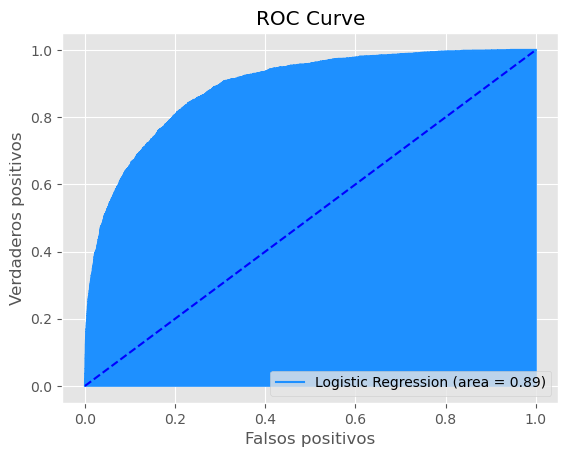

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.style.use('ggplot')
# ROC curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred) # entrega 3 array
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc, color = 'dodgerblue')
# extra para que se vea "bien"
plt.fill_between(fpr, tpr, color='dodgerblue')
plt.plot([0, 1], [0, 1],'b--')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.legend(loc="lower right")
plt.title('ROC Curve')
plt.show();

Valores entre el 75 % y 90% aprox. son considerados
como un buen ajuste. Esto quiere decir que el modelo
logra discriminar de buena forma los datos.


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_prob = model.predict(X_train)

In [ ]:
y_prob2 = np.array(pd.concat([1-y_prob, y_prob], axis = 1))

In [ ]:
y_prob

31665    0.048462
36405    0.431338
35309    0.012016
24159    0.229113
27018    0.404762
           ...   
38817    0.069858
51895    0.041811
47558    0.450753
22041    0.856849
54103    0.109291
Length: 45136, dtype: float64

In [ ]:
import random
from sklearn.model_selection import train_test_split

In [ ]:
#%pip install scikit-plot

In [ ]:
import scikitplot.metrics as skplt

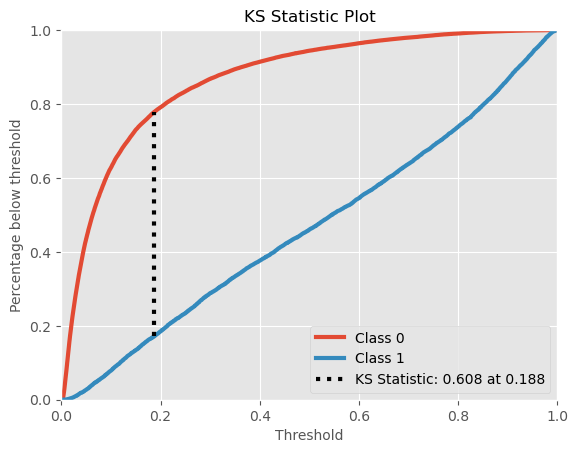

In [ ]:
skplt.plot_ks_statistic(y_train, y_prob2);

en relacion a la base del test, nuestro KS es de 0,42 lo que indica que las distribuciones tienen una separación notable pero no extrema. Esto significa que hay diferencias significativas entre las distribuciones acumuladas de probabilidad de los dos conjuntos de datos, pero no son completamente disjuntas.

### Pregunta 11
Considerando la base de test, obtenga nuevamente la curva ROC y KS asociada al modelo, ¿cómo han variado los indicadores?, además, utilizando el punto de corte obtenido, obtenga la precisión.

In [ ]:
y_pred_train = (model.predict(X_train) > punto_corte).astype(int)
y_pred_test = (model.predict(X_test) >= punto_corte).astype(int)

In [ ]:
punto_corte

0.020289

In [ ]:
confusion = confusion_matrix(y_train, y_pred_train, labels = [0, 1])

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

sensibilidad_train = TP / float(TP+FN)
print('Sensibilidad: ', sensibilidad_train)
especificidad_train = TN / float(TN+FP)
print('Especificidad:', especificidad_train)
precision_train = (TP) /(TP + FP)
print('Precisión:', precision_train)
#F1 = 2 * (precision * recall) / (precision + recall)
recall = TP / (TP + FN)
precision = (TP) /(TP + FP)
F1_train = 2 * (precision * recall) / (precision + recall)
print('F1-Score', F1_train)
auc_train = (TP + TN) /(TP + TN + FN + FP)
print('Área bajo la curva:', auc_train)

Sensibilidad:  0.9952905811623246
Especificidad: 0.20374900443736488
Precisión: 0.2619047619047619
F1-Score 0.4146870955621425
Área bajo la curva: 0.3787663948954271


In [ ]:
confusion = confusion_matrix(y_test, y_pred_test, labels = [0, 1])

In [ ]:
y_pred_test

14215    1
35351    1
40305    1
27060    0
17976    1
        ..
53304    1
47149    0
46165    1
42598    1
50157    1
Length: 11284, dtype: int32

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

sensibilidad_test = TP / float(TP+FN)
print('Sensibilidad: ', sensibilidad_test)
especificidad_test = TN / float(TN+FP)
print('Especificidad:', especificidad_test)
precision_test = (TP) /(TP + FP)
print('Precisión:', precision_test)
#F1 = 2 * (precision * recall) / (precision + recall)
recall = TP / (TP + FN)
precision = (TP) /(TP + FP)
F1_test = 2 * (precision * recall) / (precision + recall)
print('F1-Score', F1_test)
auc_test = (TP + TN) /(TP + TN + FN + FP)
print('Área bajo la curva:', auc_test)

Sensibilidad:  0.9955046996322027
Especificidad: 0.2005205386443363
Precisión: 0.2563940637827597
F1-Score 0.4077669902912622
Área bajo la curva: 0.3729174051754697


In [ ]:
train = [sensibilidad_train, especificidad_train, precision_train, F1_train, auc_train]
test = [sensibilidad_test, especificidad_test, precision_test, F1_test, auc_test]

In [ ]:
pd.DataFrame({'Entrenamineto': train,
              'Validación': test},
            index = ['Sensibilidad', 'Especificidad', 'Precisión','F1', 'AUC'])

,Entrenamineto,Validación
Sensibilidad,0.995291,0.995505
Especificidad,0.203749,0.200521
Precisión,0.261905,0.256394
F1,0.414687,0.407767
AUC,0.378766,0.372917


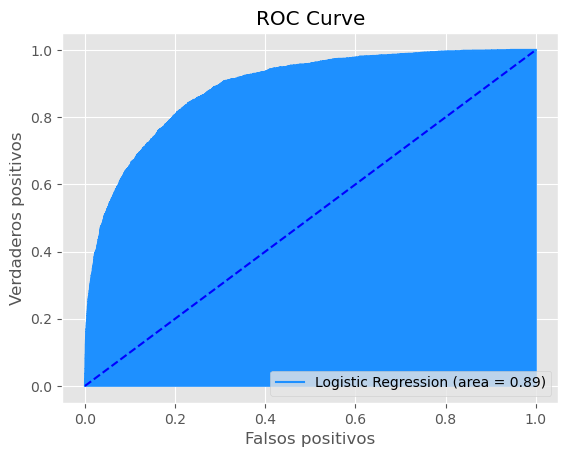

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.style.use('ggplot')
# ROC curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test,model.predict(X_test)) # entrega 3 array
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc, color = 'dodgerblue')
# extra para que se vea "bien"
plt.fill_between(fpr, tpr, color='dodgerblue')
plt.plot([0, 1], [0, 1],'b--')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.legend(loc="lower right")
plt.title('ROC Curve')
plt.show();

Valores entre el 75 % y 90% aprox. son considerados
como un buen ajuste. Esto quiere decir que el modelo
logra discriminar de buena forma los datos.

In [ ]:
y_pred2 = np.array(pd.concat([1-y_pred, y_pred], axis = 1))

<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

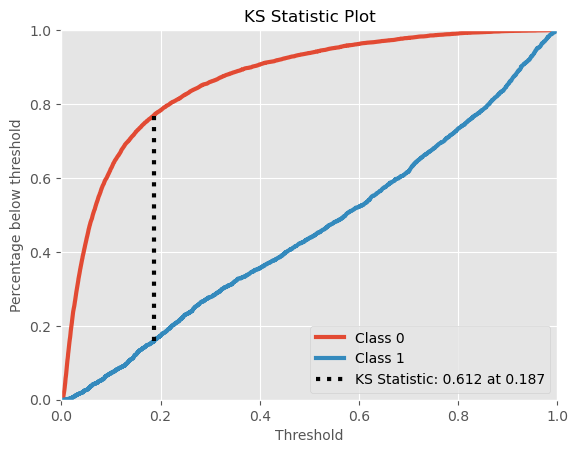

In [ ]:
# Test Kolmogorov-Smirnov
# H0: si la distribución empirica es similar a la teorica
# H1: si la distribución empirica no es similar a la teorica
import scikitplot.metrics as skplt
skplt.plot_ks_statistic(y_test, y_pred2)

In [ ]:
y_prob_test = model.predict(X_test)
y_prob3 = np.array(pd.concat([1-y_prob_test, y_prob_test], axis = 1))

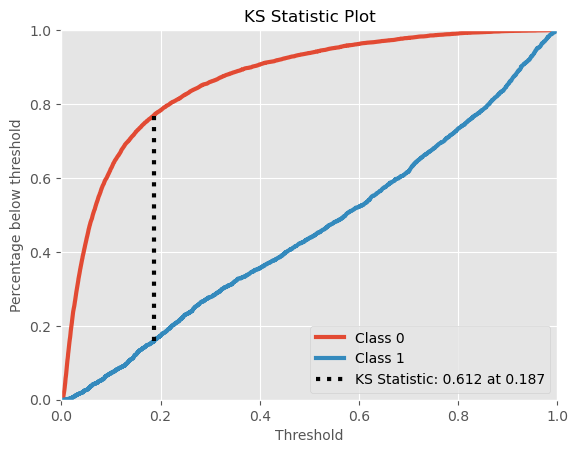

In [ ]:
import scikitplot.metrics as skplt
skplt.plot_ks_statistic(y_test, y_prob3);

en relacion a la base del test, nuestro KS es de 0,425 lo que indica que las distribuciones tienen una separación notable pero no extrema. Esto significa que hay diferencias significativas entre las distribuciones acumuladas de probabilidad de los dos conjuntos de datos, pero no son completamente disjuntas.

### Pregunta 12
Utilizando el punto de corte encontrado, determine si el día de mañana lloverá.

In [ ]:
# Suponiendo que ya tienes el modelo de regresión logística entrenado y se llama 'modelo_entrenado'
# Suponiendo que el punto de corte es 0.020289

# Define los datos del día de mañana en el mismo formato que se utilizó para entrenar el modelo
nuevo_dia = pd.DataFrame({'MinTemp': [7],
                          'MaxTemp': [18],
                          'Lluvia': [0],
                          'Evaporacion': [7],
                          'Sol': [12],
                          'VelRafaga': [72],
                          'Vel9am': [10],
                          'Vel3pm': [54],
                          'Hum9am': [65],
                          'Hum3pm': [77],
                          'Pres9am': [1001],
                          'Pre3pm': [1025],
                          'Nub9am': [3],
                          'Nub3pm': [2],
                          'Temp9am': [11.4],
                          'Temp3pm': [16.2],
                          'LluviaHoy': ['No'],
                          'Koppen': ['Subtropical'],
                          'Estacion': ['Primavera']},
                         index=['1'])



In [ ]:
model.predict(nuevo_dia)

1    0.026503
dtype: float64

Dado que estás trabajando con un modelo de regresión logística, las predicciones que obtienes son valores de probabilidad. En este caso, el valor 0.026503 sugiere que el modelo considera que es poco probable que ocurra lluvia en el nuevo día, basándose en las características específicas que proporcionaste para ese día.